## Summary

To apply linear regression technique to the given problem of predicting customer value.

In [1]:
# For logging the time taken for a step.
import time

# For importing functions written by us
import sys
sys.path.append('../../common_routines')

from relevant_functions import (get_train_test_data, 
get_all_predictor_cols, 
get_train_data,
get_test_data,
get_rel_cols)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt

In [2]:
INPUT_DIR = '../../input/'

In [3]:
ts = time.time()
train = get_train_data(INPUT_DIR)
time.time() - ts

5.094679117202759

### A model using all predictors

Let us build a model using all predictors and see how it performs

In [4]:
all_predictor_cols = get_all_predictor_cols(train)

In [5]:
ts = time.time()
X = train[all_predictor_cols]
Y = train['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
time.time() - ts

67.19136309623718

In [6]:
-cross_val_scores.mean()

2984557203449.9756

### Generate plots on data
Since the model performance is abysmal, let us go back to square one and start with some plots.

Text(0.5, 1.0, 'Target values in training data')

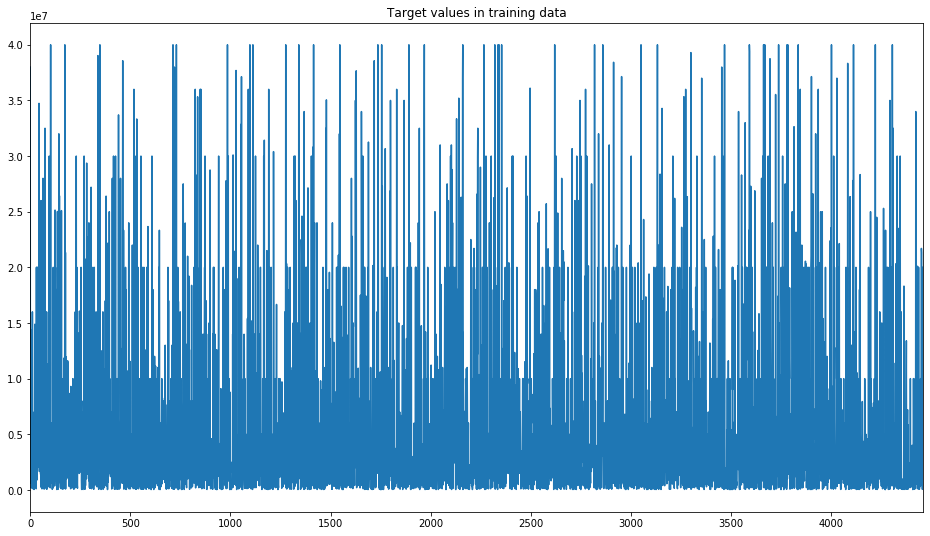

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
train['target'].plot(ax=ax)
ax.set_title('Target values in training data')

Text(0.5, 1.0, 'Logarithm of target values in training data')

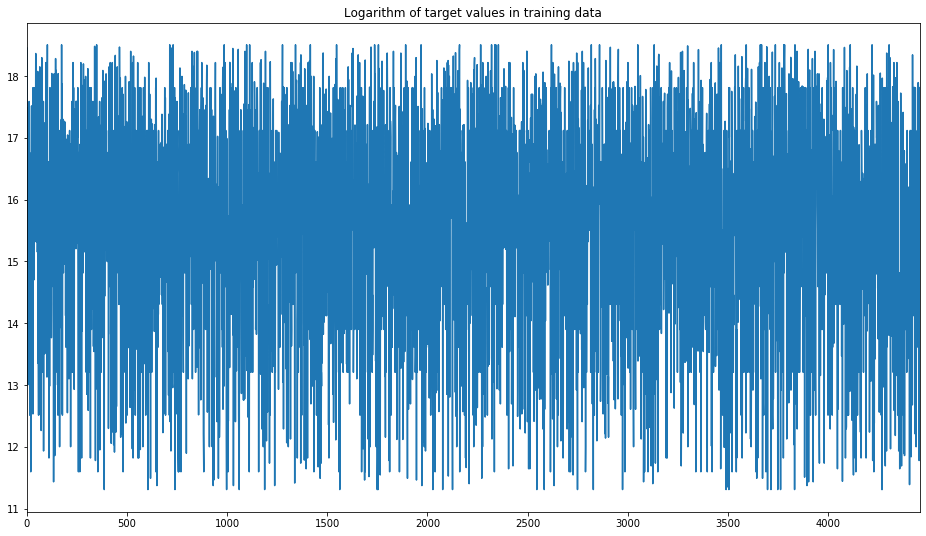

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
train['log_target'].plot(ax=ax)
ax.set_title('Logarithm of target values in training data')

### Choosing dense columns 

Since there is a large number of predictor columns to choose from, let us focus on the most dense of them and proceed forward.

In [9]:
dense_cols = get_rel_cols(30, train)

In [10]:
len(dense_cols)

40

In [11]:
dense_cols

['0ff32eb98',
 'c5a231d81',
 '91f701ba2',
 'c47340d97',
 '0572565c2',
 'adb64ff71',
 'f190486d6',
 '5c6487af1',
 'e176a204a',
 '6619d81fc',
 '70feb1494',
 '23310aa6f',
 '190db8488',
 '1db387535',
 '491b9ee45',
 '66ace2992',
 '9fd594eec',
 'fc99f9426',
 '58e2e02e6',
 '703885424',
 'eeb9cd3aa',
 '1931ccfdd',
 '324921c7b',
 '1702b5bf0',
 'fb0f5dbfe',
 'f74e8f13d',
 '20aa07010',
 '26fc93eb7',
 '58232a6fb',
 '15ace8c9f',
 'fb49e4212',
 '2ec5b290f',
 '62e59a501',
 '963a49cdc',
 '58e056e12',
 '241f0f867',
 '6eef030c1',
 'b43a7cfd5',
 'd6bb78916',
 '024c577b9']

Text(0.5, 1.0, 'Column values in training data')

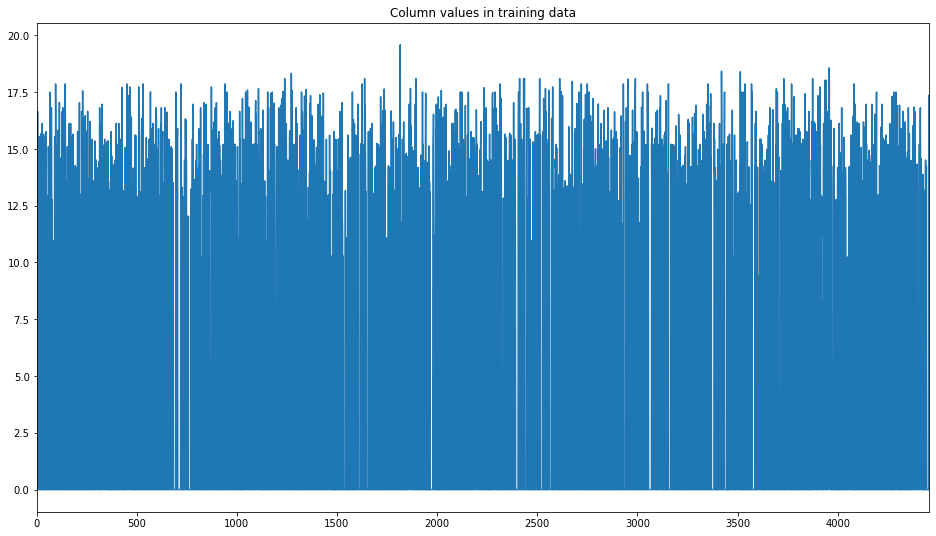

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
np.log(1.0 + train[dense_cols[5]]).plot(ax=ax)
ax.set_title('Column values in training data')

Text(0.5, 1.0, 'Column values in training data')

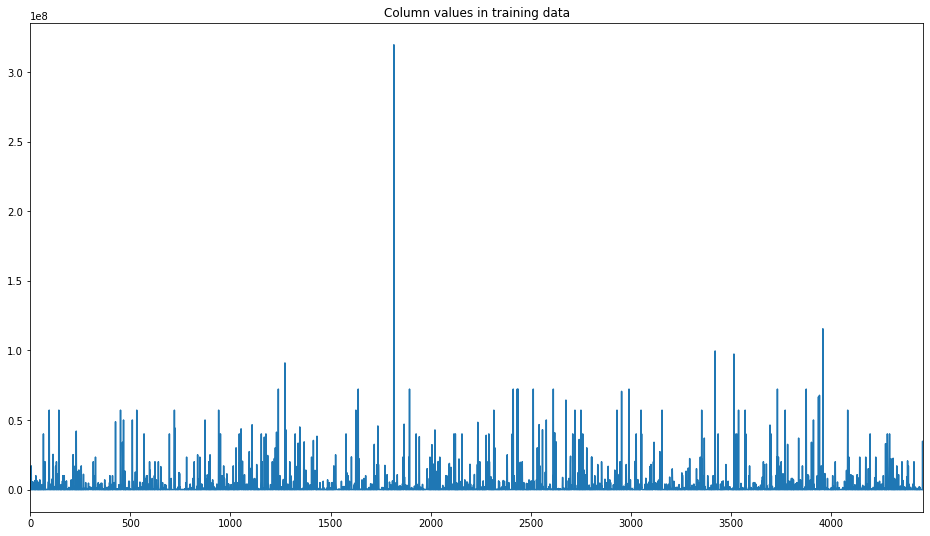

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
train[dense_cols[5]].plot(ax=ax)
ax.set_title('Column values in training data')

In [14]:
train[dense_cols[5]].describe()

count    4.459000e+03
mean     2.595256e+06
std      9.902053e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.500000e+05
max      3.196120e+08
Name: adb64ff71, dtype: float64

### Observed heteroskedasticity

There looks to be a lot of heteroskedasticity in the data and this necessitates a log transform. However, prior to doing that, let us check our model performance on the original untransformed columns (dense ones alone).

In [15]:
ts = time.time()
X = train[dense_cols]
Y = train['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(cross_val_scores)
print(-cross_val_scores.mean())
time.time() - ts

[-2.7203382  -2.91057608 -2.68028921 -2.92931644 -3.08626685]
2.865357355749271


0.06665205955505371

In [16]:
train_new = train.copy()

In [17]:
for col in all_predictor_cols:
    train_new['log_' + col] = np.log(train_new[col] + 1.0)

In [18]:
log_dense_cols = ['log_' + col for col in dense_cols]

In [19]:
ts = time.time()
X = train_new[log_dense_cols]
Y = train_new['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(cross_val_scores)
print(-cross_val_scores.mean())
time.time() - ts

[-2.89523516 -3.14018083 -2.97492283 -2.98778785 -3.34080829]
3.0677869904963235


0.4210078716278076

### Drilling down.

Let us try reducing the dimensionality of the model and see if it helps.

In [20]:
dense_cols = get_rel_cols(34, train)

In [21]:
len(dense_cols)

18

In [22]:
dense_cols

['0ff32eb98',
 'c5a231d81',
 '91f701ba2',
 'c47340d97',
 '0572565c2',
 'adb64ff71',
 'f190486d6',
 '5c6487af1',
 'e176a204a',
 '6619d81fc',
 '70feb1494',
 '23310aa6f',
 '190db8488',
 '1db387535',
 '491b9ee45',
 '66ace2992',
 '9fd594eec',
 'fc99f9426']

In [23]:
ts = time.time()
X = train[dense_cols]
Y = train['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(cross_val_scores)
print(-cross_val_scores.mean())
time.time() - ts

[-2.76164054 -2.91574059 -2.70862762 -3.02486068 -3.12001988]
2.906177862250561


0.031245946884155273

In [24]:
ts = time.time()
X = train_new[['log_' + col for col in dense_cols]]
Y = train_new['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(cross_val_scores)
print(-cross_val_scores.mean())
time.time() - ts

[-2.89892    -3.11735319 -2.96535827 -2.97395005 -3.34959001]
3.0610343022001665


0.033756256103515625

### Not much progress

It does not look like we are getting much benefit here. Hence, let us try increasing the number of predictors.

In [25]:
dense_cols = get_rel_cols(10, train)

In [26]:
len(dense_cols)

376

In [27]:
ts = time.time()
X = train[dense_cols]
Y = train['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(cross_val_scores)
print(-cross_val_scores.mean()) 
time.time() - ts

[-2.98464444 -3.13828437 -3.1709242  -3.32391838 -3.29191634]
3.181937547134139


0.3007071018218994

In [28]:
ts = time.time()
X = train_new[['log_' + col for col in dense_cols]]
Y = train_new['log_target']
cross_val_scores = cross_val_score(LinearRegression(), X, Y, cv=5,scoring='neg_mean_squared_error')
print(cross_val_scores)
print(-cross_val_scores.mean())
time.time() - ts

[-3.04752971 -3.37425385 -3.22223831 -3.24476164 -3.4202559 ]
3.261807882827957


0.2773172855377197

### Conclusion

We look to be plateauing at around 2.96 and there does not look to be much of a benefit in moving forward. Hence we conclude our analysis here and proceed with the generation of predictions for the test set.

In [30]:
# Let us train the best model over the entire data set.
dense_cols = get_rel_cols(34, train)
X = train[dense_cols]
Y = train['log_target']
my_model = LinearRegression().fit(X, Y)

In [37]:
# Generate predictions on test data
ts = time.time()
test = get_test_data(INPUT_DIR)
test_X = test[dense_cols]
test_predictions = my_model.predict(test_X)

# Make sure  that the predictions are made non negative.
test_predictions[test_predictions < 0] = 0
test['log_target'] = test_predictions
test['target'] = np.exp(test['log_target']) - 1
time.time() - ts

69.83174562454224

In [36]:
test['log_target'].describe()

count    49342.000000
mean        15.394084
std          0.371981
min         -9.786559
25%         15.283461
50%         15.283461
75%         15.337652
max         26.083537
Name: log_target, dtype: float64

In [35]:
test[['ID', 'target']].to_csv('submission_linear_regression.csv', index=False)